In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import random

from scipy import eye, asarray, dot, sum, diag
from scipy.linalg import svd
from mpl_toolkits.basemap import Basemap
import matplotlib as mpl
from matplotlib import cm
from colorspacious import cspace_converter
from collections import OrderedDict
from netCDF4 import Dataset
from numpy import linspace
from numpy import meshgrid


import PCA_functions as pf
import Extreme_functions as ef

from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import ParCorr, CMIknn
import tigramite.data_processing as pp

from Data import Data
from datetime import datetime

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

import itertools
from collections import Counter
import pickle

from numpy import linalg as LA

import matplotlib.cm as cm

from scipy.special import inv_boxcox
from scipy import stats

from matplotlib import animation

import scipy.stats as st

import reverse_geocoder as rg

from pandas_datareader import wb
import scipy.stats as st

import Rung as rung

from pandas_datareader import wb

import seaborn as sns


import seaborn as sns
import feature_finder_keiko as ff
import feature_finder_f as ff1

from scipy import signal

plt.rcParams["figure.figsize"] = (20,10)

I do this for neural network notebook

In [4]:
step = 1
train_start = np.arange(1948,1977,step)
validation_end = np.arange(1982,2011,step)
test_start = np.arange(1983,2012,step)
test_end = np.arange(1987,2016,step)

n_components_sst = np.load("sst_number.npy")

In [17]:
step = 1
train_start = np.arange(1951,1952,step)
validation_end = np.arange(2000,2001,step)
test_start = np.arange(2001,2002,step)
test_end = np.arange(2005,2006,step)

#n_components_sst = np.load("sst_number.npy")
n_components_sst = [69]

In [18]:
tau = 11
f = 12
level = 99
extremes_treshold = -1

In [19]:
ijz = -1
temporal_limits = {"time_min":datetime(train_start[ijz], 1, 1, 0, 0),"time_max":datetime(validation_end[ijz], 12, 1, 0, 0)}
data_sst, ts, V, df_sst, avg, std = ff.PCA_computer_rotated('../../../nc/sst.mnmean.nc', "sst",temporal_limits, n_components_sst[ijz], -9.96921e+36)

In [20]:
np.save("data_sst.npy", data_sst)
np.save("V.npy", V)
np.save("ts.npy", ts)
np.save("avg.npy",avg)
np.save("std.npy",std)

In [21]:
df_sst.to_csv("df_sst.csv")

In [22]:
temporal_limits = {"time_min":datetime(test_start[ijz], 1, 1, 0, 0),"time_max":datetime(test_end[ijz], 12, 1, 0, 0)}
data_sst_test = ff.data_generator_avg_std('../../../nc/sst.mnmean.nc', "sst",temporal_limits, avg, std, 12, -9.96921e+36)

In [23]:
np.save("data_sst_test.npy", data_sst_test)

In [7]:
tau = 12
f = 12
level = 99
extremes_treshold = -1
class_list = np.load("ET_class_list.npy")

In [8]:
class_name = "Cwb"
index = (np.array(class_list) == class_name)

In [ ]:
ijz = -1
temporal_limits = {"time_min":datetime(train_start[ijz], 1, 1, 0, 0),"time_max":datetime(validation_end[ijz], 12, 1, 0, 0)}
data_sst, ts, V, df_sst, avg, std = ff.PCA_computer_rotated('../../../nc/sst.mnmean.nc', "sst",temporal_limits, n_components_sst[ijz], -9.96921e+36)

In [3]:
step = 1
train_start = np.arange(1948,1977,step)
#train_end = np.arange(1955,2006,step)
validation_end = np.arange(1982,2011,step)
test_start = np.arange(1983,2012,step)
test_end = np.arange(1987,2016,step)

n_components_sst = np.load("sst_number.npy")
tau = 12
f = 12
level = 99

temporal_limits = {"time_min":datetime(1930, 1, 1, 0, 0),"time_max":datetime(2015, 12, 1, 0, 0)}
lon1_sst = np.arange(-180,180,2)
data_sst, ts, V, df_sst, lon_sst, lat_sst = ff.PCA_computer_rotated_locs('../../../nc/sst.mnmean.nc', "sst",temporal_limits, n_components_sst[0], -9.96921e+36)
deg_result = np.zeros((len(lat_sst),len(lon1_sst)))

In [86]:
tau = 12
deg_result1 = np.load("../../whole_data_results/ZW/areas_1/corr_{}_{}_{}_{}_{}.npy".format(f,step,test_start[0],test_end[-1],tau))
#deg_result = np.load("../../whole_data_results/ET_orac/areas_{}/pcmci_{}_{}_{}_{}_{}.npy".format(class_name,f,step,test_start[0],test_end[-1],tau))


In [87]:
level = np.ceil(np.nanmax(deg_result1)*0.7)

In [88]:
deg_result = np.zeros(deg_result1.shape)
nan_index= np.isnan(deg_result1)

deg_result[deg_result1 > level] = 1
deg_result[nan_index] = np.nan

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """


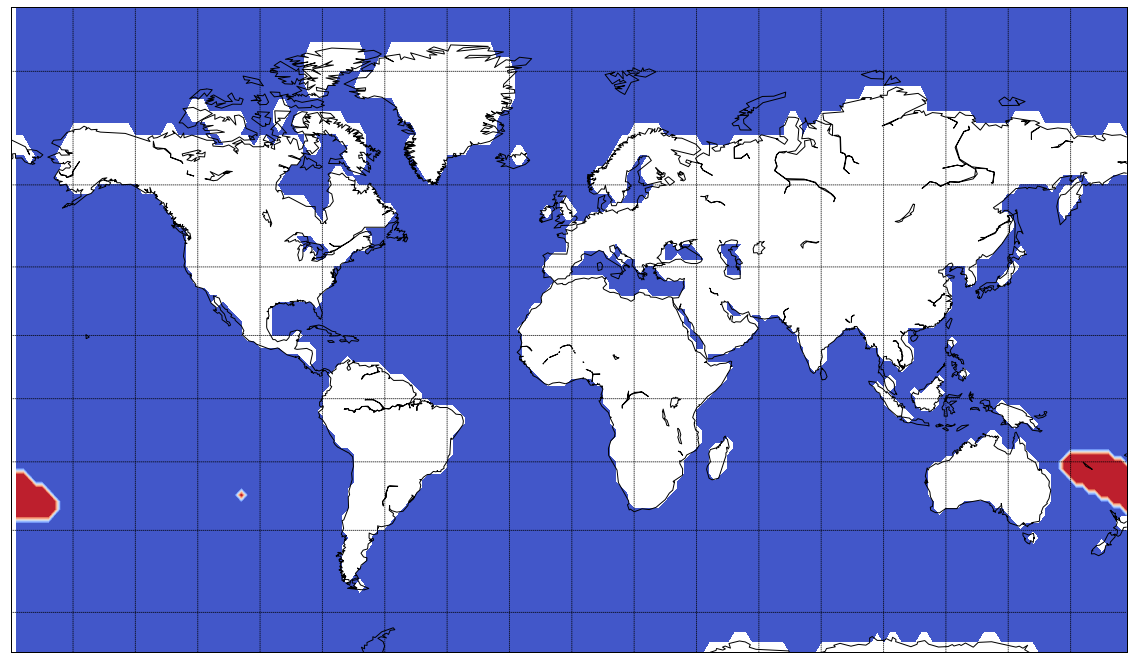

In [89]:
#deg_result[deg_result > 0] = 1

lon  = lon1_sst
lat = lat_sst
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1_sst.min(), \
  urcrnrlon=lon1_sst.max(),llcrnrlat=lat_sst.min()+20,urcrnrlat=lat_sst.max(), \
  resolution='c')

#m = Basemap(projection='robin',lon_0=0,resolution='c')

lon2, lat2 = np.meshgrid(lon,lat)
x, y = m(lon2, lat2)
x, y = m(lon2, lat2)
fig = plt.figure(figsize=(20,15))
#m.fillcontinents(color='gray',lake_color='gray')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
cs = m.contourf(x,y,deg_result,20,cmap=plt.cm.get_cmap('coolwarm'))
#plt.title('PCMCI, lag of {}'.format(tau),fontsize=20)
#cbar.ax.tick_params(labelsize=25)
#plt.colorbar();
#plt.savefig("EOF{}.png".format(pc))
#plt.savefig("areas_PCMCI_{}_cut.png".format(tau))

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """


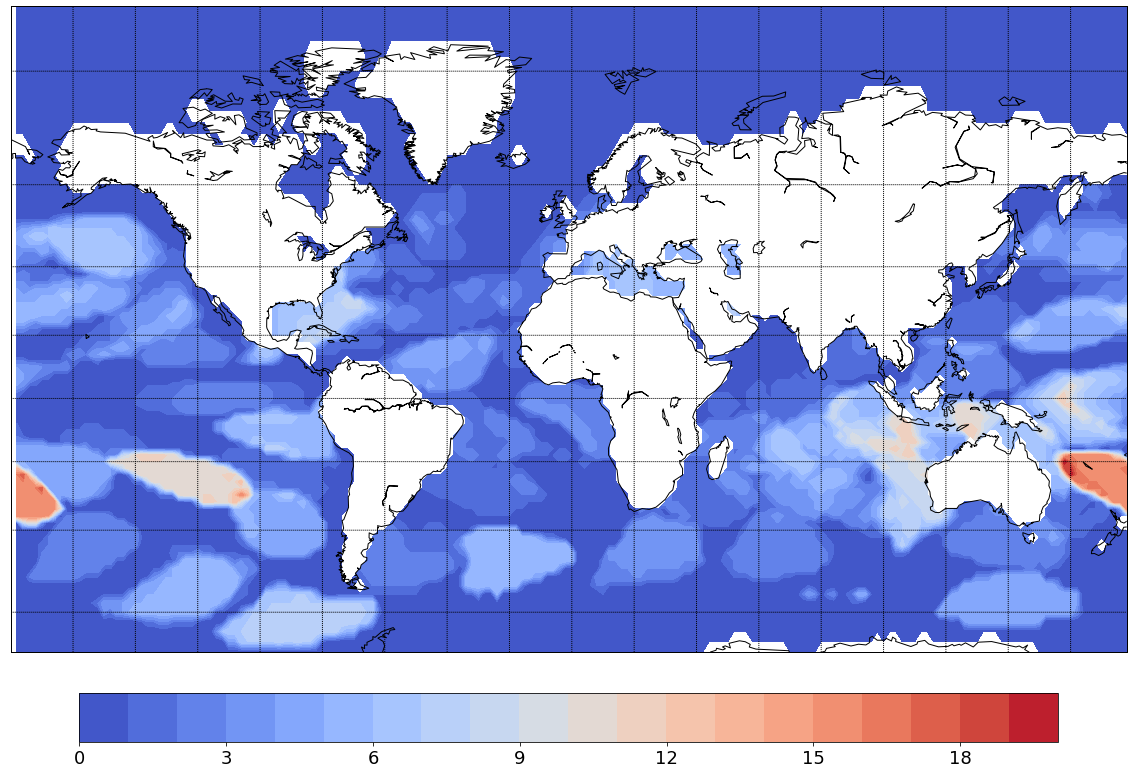

In [39]:
#deg_result[deg_result > 0] = 1

lon  = lon1_sst
lat = lat_sst
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1_sst.min(), \
  urcrnrlon=lon1_sst.max(),llcrnrlat=lat_sst.min()+20,urcrnrlat=lat_sst.max(), \
  resolution='c')

#m = Basemap(projection='robin',lon_0=0,resolution='c')

lon2, lat2 = np.meshgrid(lon,lat)
x, y = m(lon2, lat2)
x, y = m(lon2, lat2)
fig = plt.figure(figsize=(20,15))
#m.fillcontinents(color='gray',lake_color='gray')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
cs = m.contourf(x,y,deg_result1,20,cmap=plt.cm.get_cmap('coolwarm'))
#plt.title('PCMCI, lag of {}'.format(tau),fontsize=20)
#cbar.ax.tick_params(labelsize=25)
#plt.colorbar();
cbar = plt.colorbar(fraction=0.06,pad = 0.05,orientation="horizontal")
cbar.ax.tick_params(labelsize=18)
#plt.savefig("EOF{}.png".format(pc))
#plt.savefig("areas_PCMCI_{}.png".format(tau))

In [15]:
tau = 2

In [16]:
deg_result1 = np.load("../../whole_data_results/ET_orac/areas_1/corr_{}_{}_{}_{}_{}.npy".format(f,step,test_start[0],test_end[-1],tau))
#deg_result = np.load("../../whole_data_results/ET_orac/areas_{}/pcmci_{}_{}_{}_{}_{}.npy".format(class_name,f,step,test_start[0],test_end[-1],tau))

In [17]:
level = np.ceil(np.nanmax(deg_result1)*0.7)

In [18]:
deg_result = np.zeros(deg_result1.shape)
nan_index= np.isnan(deg_result1)

deg_result[deg_result1 > level] = 1
deg_result[nan_index] = np.nan

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """


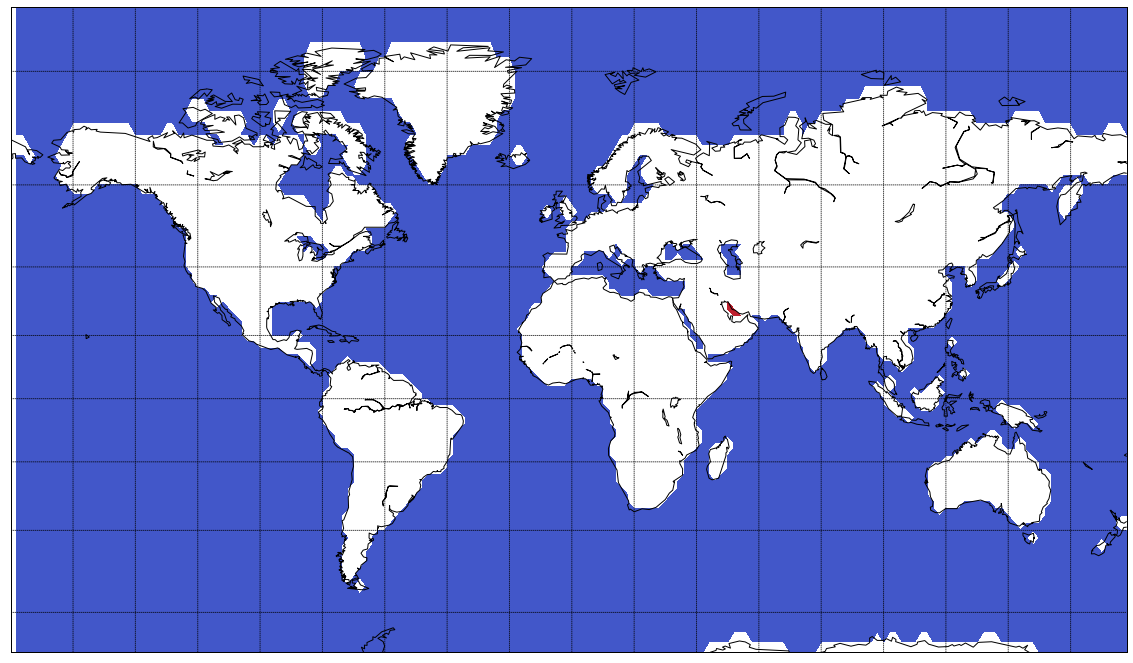

In [19]:
#deg_result[deg_result > 0] = 1

lon  = lon1_sst
lat = lat_sst
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1_sst.min(), \
  urcrnrlon=lon1_sst.max(),llcrnrlat=lat_sst.min()+20,urcrnrlat=lat_sst.max(), \
  resolution='c')

#m = Basemap(projection='robin',lon_0=0,resolution='c')

lon2, lat2 = np.meshgrid(lon,lat)
x, y = m(lon2, lat2)
x, y = m(lon2, lat2)
fig = plt.figure(figsize=(20,15))
#m.fillcontinents(color='gray',lake_color='gray')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
cs = m.contourf(x,y,deg_result,20,cmap=plt.cm.get_cmap('coolwarm'))
#plt.title('CORR, lag of {}'.format(tau),fontsize=20)
#cbar.ax.tick_params(labelsize=25)
#plt.colorbar();
#plt.savefig("EOF{}.png".format(pc))
plt.savefig("areas_CORR_{}_cut.png".format(tau))

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """


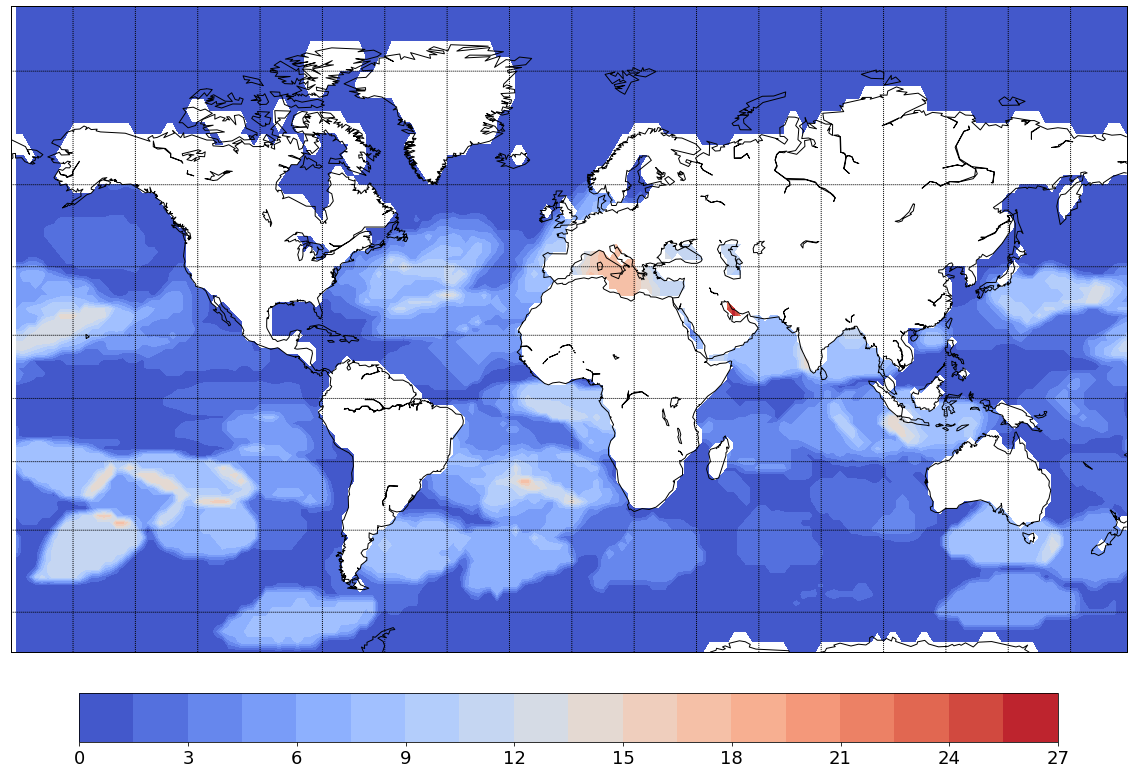

In [20]:
#deg_result[deg_result > 0] = 1

lon  = lon1_sst
lat = lat_sst
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1_sst.min(), \
  urcrnrlon=lon1_sst.max(),llcrnrlat=lat_sst.min()+20,urcrnrlat=lat_sst.max(), \
  resolution='c')

#m = Basemap(projection='robin',lon_0=0,resolution='c')

lon2, lat2 = np.meshgrid(lon,lat)
x, y = m(lon2, lat2)
x, y = m(lon2, lat2)
fig = plt.figure(figsize=(20,15))
#m.fillcontinents(color='gray',lake_color='gray')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
cs = m.contourf(x,y,deg_result1,20,cmap=plt.cm.get_cmap('coolwarm'))
#plt.title('CORR, lag of {}'.format(tau),fontsize=20)
#cbar.ax.tick_params(labelsize=25)
#plt.colorbar()
cbar = plt.colorbar(fraction=0.06,pad = 0.05,orientation="horizontal")
cbar.ax.tick_params(labelsize=18)
#plt.savefig("EOF{}.png".format(pc))
plt.savefig("areas_CORR_{}.png".format(tau))

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """


Text(0.5, 1.0, 'PCMCI, lag of 12')

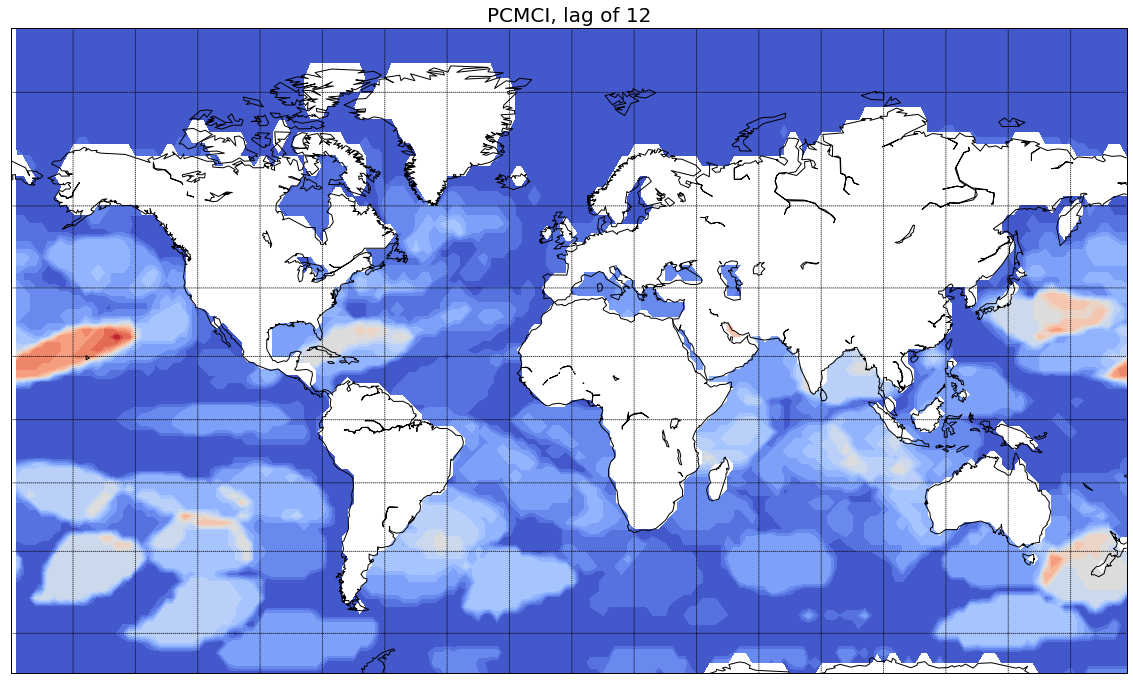

In [64]:
#deg_result[deg_result > 0] = 1

lon  = lon1_sst
lat = lat_sst
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1_sst.min(), \
  urcrnrlon=lon1_sst.max(),llcrnrlat=lat_sst.min()+20,urcrnrlat=lat_sst.max(), \
  resolution='c')

#m = Basemap(projection='robin',lon_0=0,resolution='c')

lon2, lat2 = np.meshgrid(lon,lat)
x, y = m(lon2, lat2)
x, y = m(lon2, lat2)
fig = plt.figure(figsize=(20,15))
#m.fillcontinents(color='gray',lake_color='gray')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
cs = m.contourf(x,y,deg_result,20,cmap=plt.cm.get_cmap('coolwarm'))
plt.title('PCMCI, lag of {}'.format(tau),fontsize=20)
#cbar.ax.tick_params(labelsize=25)
#plt.colorbar();
#plt.savefig("EOF{}.png".format(pc))
#plt.savefig("./areas/{}_PCMCI_{}.png".format(cc,tau))

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """


Text(0.5, 1.0, 'CORR, lag of 12')

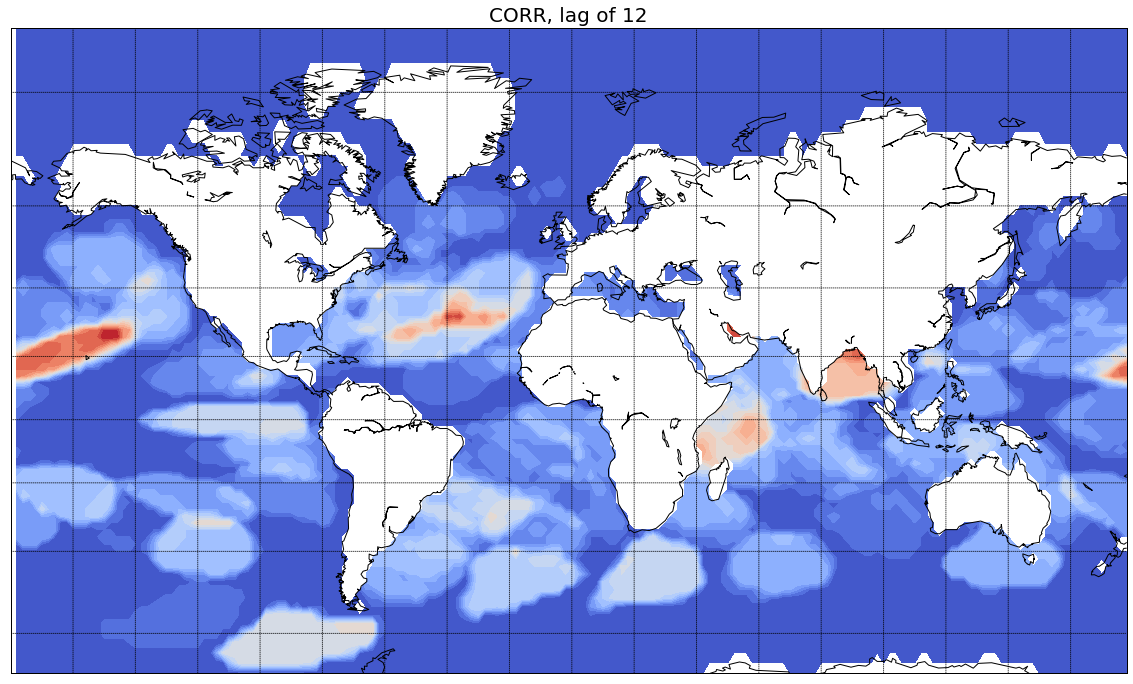

In [67]:
#deg_result[deg_result > 0] = 1

lon  = lon1_sst
lat = lat_sst
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1_sst.min(), \
  urcrnrlon=lon1_sst.max(),llcrnrlat=lat_sst.min()+20,urcrnrlat=lat_sst.max(), \
  resolution='c')

#m = Basemap(projection='robin',lon_0=0,resolution='c')

lon2, lat2 = np.meshgrid(lon,lat)
x, y = m(lon2, lat2)
x, y = m(lon2, lat2)
fig = plt.figure(figsize=(20,15))
#m.fillcontinents(color='gray',lake_color='gray')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
cs = m.contourf(x,y,deg_result,20,cmap=plt.cm.get_cmap('coolwarm'))
plt.title('CORR, lag of {}'.format(tau),fontsize=20)
#cbar.ax.tick_params(labelsize=25)
#plt.colorbar();
#plt.savefig("EOF{}.png".format(pc))
#plt.savefig("./areas/{}_PCMCI_{}.png".format(cc,tau))

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """


Text(0.5, 1.0, 'CORR, lag of 12')

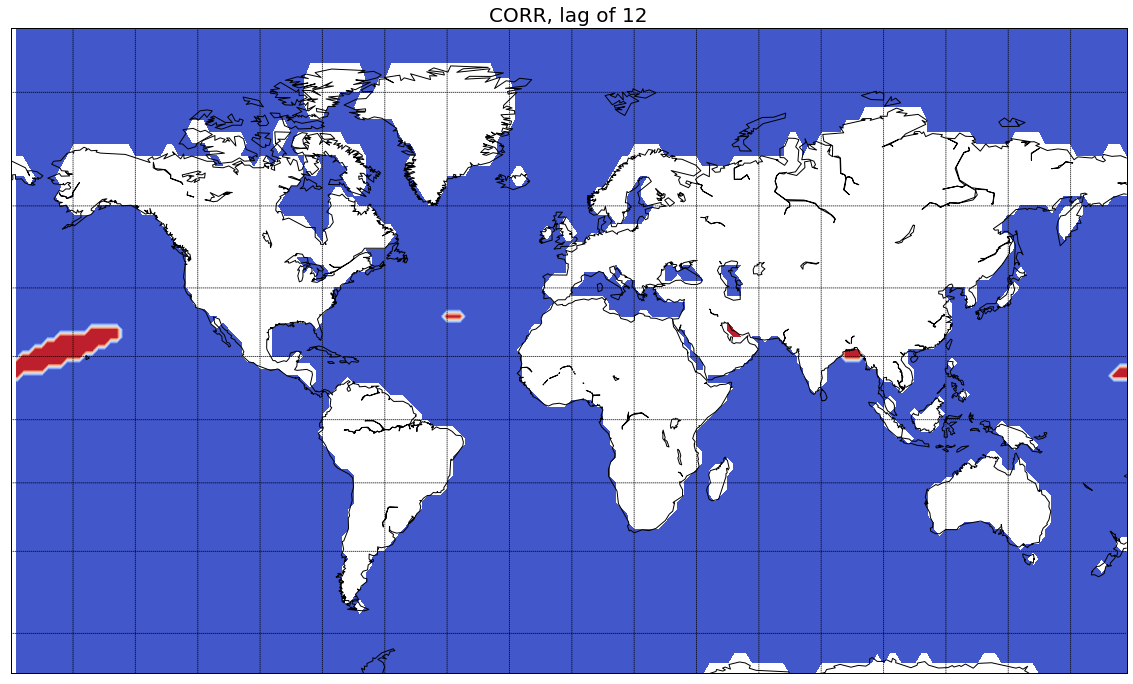

In [61]:
#deg_result[deg_result > 0] = 1

lon  = lon1_sst
lat = lat_sst
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1_sst.min(), \
  urcrnrlon=lon1_sst.max(),llcrnrlat=lat_sst.min()+20,urcrnrlat=lat_sst.max(), \
  resolution='c')

#m = Basemap(projection='robin',lon_0=0,resolution='c')

lon2, lat2 = np.meshgrid(lon,lat)
x, y = m(lon2, lat2)
x, y = m(lon2, lat2)
fig = plt.figure(figsize=(20,15))
#m.fillcontinents(color='gray',lake_color='gray')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
cs = m.contourf(x,y,deg_result,20,cmap=plt.cm.get_cmap('coolwarm'))
plt.title('CORR, lag of {}'.format(tau),fontsize=20)
#cbar.ax.tick_params(labelsize=25)
#plt.colorbar();
#plt.savefig("EOF{}.png".format(pc))
#plt.savefig("./areas/{}_PCMCI_{}.png".format(cc,tau))

In [6]:
def PCA_computer_rotated_locs(file_name, code, temporal_limits,n_components_sst=98, missing_value=-9.96921e+36):
    sst = Data(file_name,code,temporal_limits, missing_value= missing_value)

    result = sst.get_data()
    lon_sst_list = sst.get_lon_list()
    lat_sst_list = sst.get_lat_list()
    lon_sst = sst.get_lon()
    lat_sst = sst.get_lat()

    result_sst, avgs, stds = pf.deseasonalize_avg_std(np.array(result))
    result_sst = signal.detrend(result_sst, axis=0)
    weights = np.sqrt(np.abs(np.cos(np.array(lat_sst_list)* math.pi/180)))
    for i in range(len(weights)):
        result_sst[:,i] = weights[i] * result_sst[:,i]

    data_sst = pd.DataFrame(result_sst)
        
    V, U, S, ts, eig, explained, max_comps = rung.pca_svd(data_sst,truncate_by='max_comps', max_comps=n_components_sst)
        
    Vr, Rot = rung.varimax(V)
    Vr = rung.svd_flip(Vr)

    # Get explained variance of rotated components
    s2 = np.diag(S)**2 / (ts.shape[0] - 1.)

    # matrix with diagonal containing variances of rotated components
    S2r = np.dot(np.dot(np.transpose(Rot), np.matrix(np.diag(s2))), Rot)
    expvar = np.diag(S2r)

    sorted_expvar = np.sort(expvar)[::-1]
    # s_orig = ((Vt.shape[1] - 1) * s2) ** 0.5

    # reorder all elements according to explained variance (descending)
    nord = np.argsort(expvar)[::-1]
    Vr = Vr[:, nord]

    # Get time series of UNMASKED data
    comps_ts = np.matmul(np.array(data_sst),Vr)

    df_sst = pd.DataFrame({"lons":lon_sst_list,"lats":lat_sst_list})

    lon_temp = df_sst["lons"].values
    lon_temp[lon_temp > 180] = lon_temp[lon_temp > 180] -360
    df_sst["lons"].vlues = lon_temp
    
    return(result_sst, comps_ts, Vr, df_sst, lon_sst, lat_sst)

In [7]:
step = 1
train_start = np.arange(1948,1977,step)
#train_end = np.arange(1955,2006,step)
validation_end = np.arange(1982,2011,step)
test_start = np.arange(1983,2012,step)
test_end = np.arange(1987,2016,step)

In [39]:
n_components_sst = np.load("sst_number.npy")
tau = 12
f = 12
level = 99

In [9]:
temporal_limits = {"time_min":datetime(train_start[-1], 1, 1, 0, 0),"time_max":datetime(validation_end[-1], 12, 1, 0, 0)}
lon1_sst = np.arange(-180,180,2)
data_sst, ts, V, df_sst, lon_sst, lat_sst = PCA_computer_rotated_locs('../../../nc/sst.mnmean.nc', "sst",temporal_limits, n_components_sst[0], -9.96921e+36)
deg_result = np.zeros((len(lat_sst),len(lon1_sst)))

In [14]:
for tau in np.arange(1,13)
    for ijz in range(4):
        temporal_limits = {"time_min":datetime(train_start[ijz], 1, 1, 0, 0),"time_max":datetime(validation_end[ijz], 12, 1, 0, 0)}
        data_sst, ts, V, df_sst, _, _ = PCA_computer_rotated_locs('../../../nc/sst.mnmean.nc', "sst",temporal_limits, n_components_sst[ijz], -9.96921e+36)
        pcmci = np.load("../../whole_data_results/ZW/best_link/pcmci_{}_{}_{}_{}_{}.npy".format(f,train_start[ijz],validation_end[ijz],tau,n_components_sst[ijz]))
        comps = pcmci[:,0]

        lat_number = len(lat_sst)
        lon_number = len(lon1_sst)

        for comp in set(comps):
            deg = np.zeros((len(lat_sst),len(lon1_sst)))
            df_sst["pc"] = V[:,comp-1]
            for i in range(lat_number):
                for j in range(lon_number):
                    if not df_sst[(df_sst.lats == lat_sst[i]) & (df_sst.lons == lon1_sst[j])].pc.values.size == 0:
                        deg[i,j] = df_sst[(df_sst.lats == lat_sst[i]) & (df_sst.lons == lon1_sst[j])].pc.values
                    else:
                        deg[i,j]=np.nan


            if np.abs(np.nanmin(deg)) > np.abs(np.nanmax(deg)):
                limit = np.nanpercentile(deg, 1 - level)
                deg[deg>=limit]=0
                deg[deg<limit]=1
            else:
                limit = np.nanpercentile(deg, level)
                deg[deg<=limit]=0
                deg[deg>limit]=1

            deg_result = deg_result + deg 

In [14]:
deg_result1 = np.load("../../whole_data_results/ET_orac/areas_multi/pcmci_12_1_1983_1999_12.npy")

# Climate Classes:

In [37]:
class_name = "Cwb"
cc = "ET"
tau = 3
deg_result1 = np.load("../../whole_data_results/ET_orac/areas_1_{}/pcmci_{}_{}_{}_{}_{}.npy".format(class_name, f,step,test_start[0],test_end[-1],tau))
#deg_result = np.load("../../whole_data_results/ET_orac/areas_{}/pcmci_{}_{}_{}_{}_{}.npy".format(class_name,f,step,test_start[0],test_end[-1],tau))

In [38]:
level = np.ceil(np.nanmax(deg_result1)*0.7)

In [39]:
deg_result = np.zeros(deg_result1.shape)
nan_index= np.isnan(deg_result1)

deg_result[deg_result1 > level] = 1
deg_result[nan_index] = np.nan

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """


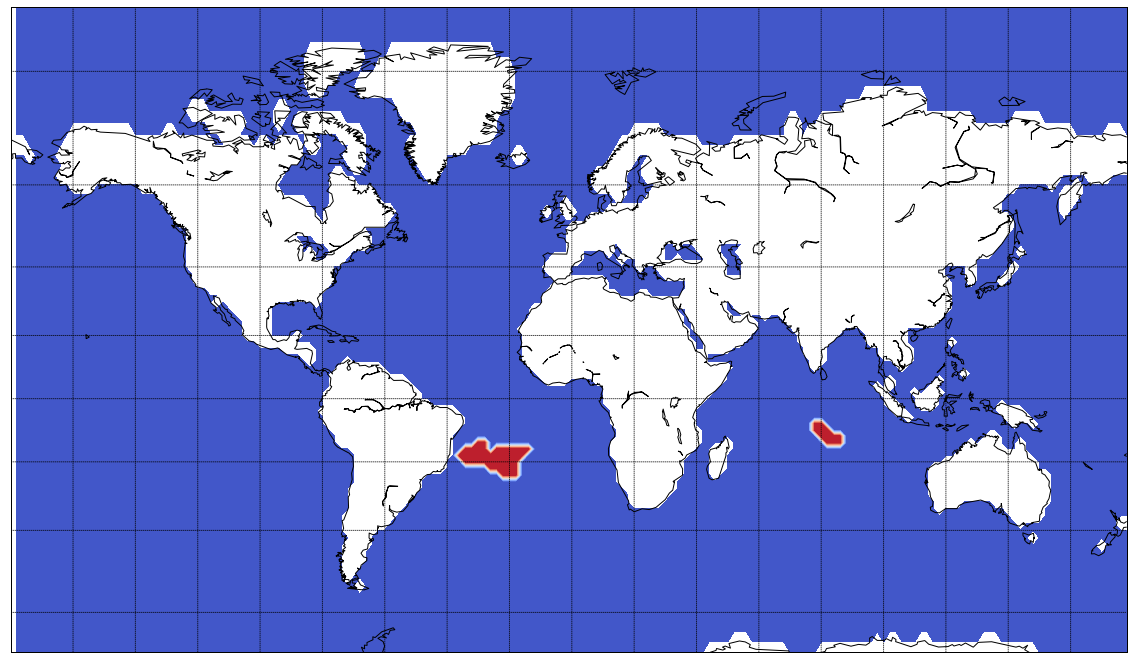

In [40]:
#deg_result[deg_result > 0] = 1

lon  = lon1_sst
lat = lat_sst
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1_sst.min(), \
  urcrnrlon=lon1_sst.max(),llcrnrlat=lat_sst.min()+20,urcrnrlat=lat_sst.max(), \
  resolution='c')

#m = Basemap(projection='robin',lon_0=0,resolution='c')

lon2, lat2 = np.meshgrid(lon,lat)
x, y = m(lon2, lat2)
x, y = m(lon2, lat2)
fig = plt.figure(figsize=(20,15))
#m.fillcontinents(color='gray',lake_color='gray')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
cs = m.contourf(x,y,deg_result,20,cmap=plt.cm.get_cmap('coolwarm'))
#plt.title('ZW, PCMCI, lag of {}'.format(tau),fontsize=20)
#cbar.ax.tick_params(labelsize=25)
#plt.colorbar();
#plt.savefig("EOF{}.png".format(pc))
#plt.savefig("./areas/{}_PCMCI_{}.png".format(cc,tau))

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # Remove the CWD from sys.path while we load stuff.


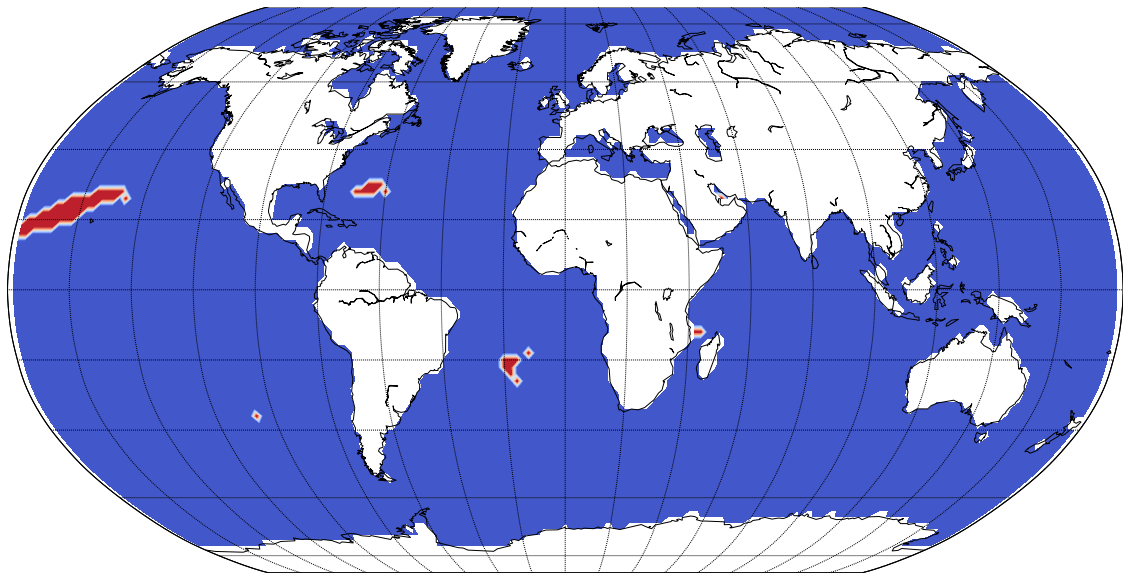

In [37]:
    #deg_result[deg_result > 0] = 1

    lon  = lon1_sst
    lat = lat_sst
    #m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1_sst.min(), \
    #  urcrnrlon=lon1_sst.max(),llcrnrlat=lat_sst.min()+20,urcrnrlat=lat_sst.max(), \
    #  resolution='c')

    
    m = Basemap(projection='robin',lon_0=0,resolution='c')
    
    lon2, lat2 = np.meshgrid(lon,lat)
    x, y = m(lon2, lat2)
    x, y = m(lon2, lat2)
    fig = plt.figure(figsize=(20,15))
    #m.fillcontinents(color='gray',lake_color='gray')
    m.drawcoastlines()
    m.drawparallels(np.arange(-80.,81.,20.))
    m.drawmeridians(np.arange(-180.,181.,20.))
    m.drawmapboundary(fill_color='white')
    cs = m.contourf(x,y,deg_result,20,cmap=plt.cm.get_cmap('coolwarm'))
    #plt.title('ZW, PCMCI, lag of {}'.format(tau),fontsize=20)
    #cbar.ax.tick_params(labelsize=25)
    #plt.colorbar();
    #plt.savefig("EOF{}.png".format(pc))
    #plt.savefig("./areas/{}_PCMCI_{}.png".format(cc,tau))

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """


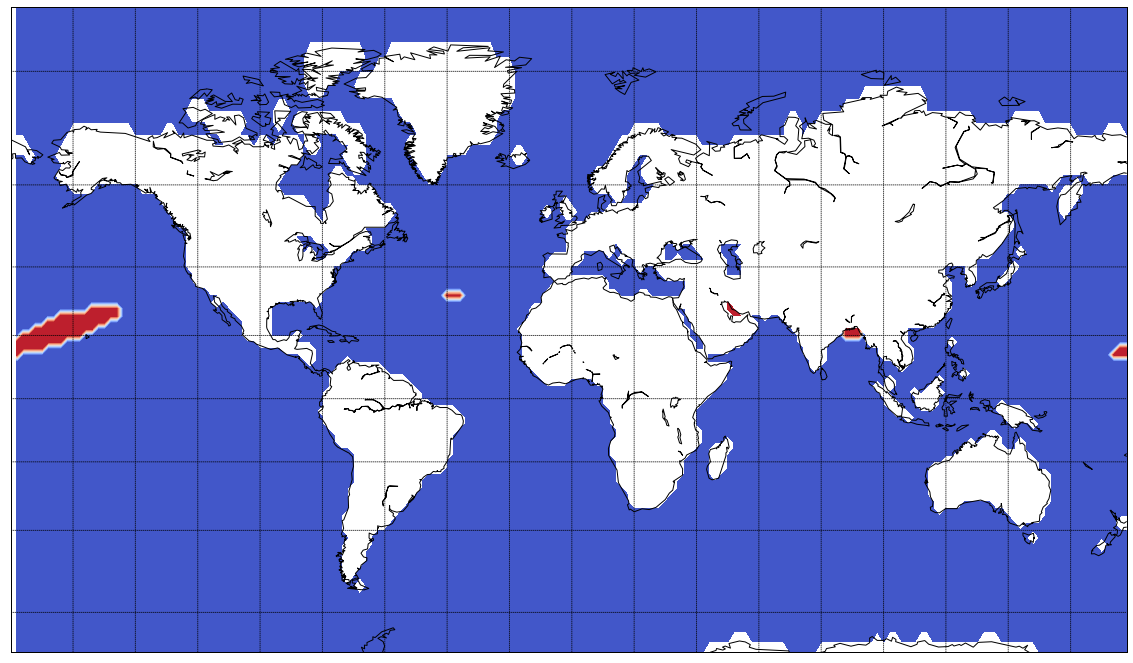

In [25]:
    #deg_result[deg_result > 0] = 1

    lon  = lon1_sst
    lat = lat_sst
    m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1_sst.min(), \
      urcrnrlon=lon1_sst.max(),llcrnrlat=lat_sst.min()+20,urcrnrlat=lat_sst.max(), \
      resolution='c')
    
    #m = Basemap(projection='robin',lon_0=0,resolution='c')

    lon2, lat2 = np.meshgrid(lon,lat)
    x, y = m(lon2, lat2)
    x, y = m(lon2, lat2)
    fig = plt.figure(figsize=(20,15))
    #m.fillcontinents(color='gray',lake_color='gray')
    m.drawcoastlines()
    m.drawparallels(np.arange(-80.,81.,20.))
    m.drawmeridians(np.arange(-180.,181.,20.))
    m.drawmapboundary(fill_color='white')
    cs = m.contourf(x,y,deg_result,20,cmap=plt.cm.get_cmap('coolwarm'))
    #plt.title('ZW, PCMCI, lag of {}'.format(tau),fontsize=20)
    #cbar.ax.tick_params(labelsize=25)
    #plt.colorbar();
    #plt.savefig("EOF{}.png".format(pc))
    #plt.savefig("./areas/{}_PCMCI_{}.png".format(cc,tau))

In [89]:
class_name = "Aw"
cc = "ET"
tau = 12
deg_result1 = np.load("../../whole_data_results/ET_orac/areas_2/pcmci_{}_{}_{}_{}_{}.npy".format(f,step,test_start[0],test_end[-1],tau))
#deg_result = np.load("../../whole_data_results/ET_orac/areas_{}/pcmci_{}_{}_{}_{}_{}.npy".format(class_name,f,step,test_start[0],test_end[-1],tau))

In [104]:
deg_result = np.zeros(deg_result1.shape)
nan_index= np.isnan(deg_result1)

deg_result[deg_result1 > 11] = 1
deg_result[nan_index] = np.nan

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """


Text(0.5, 1.0, 'ZW, PCMCI, lag of 12')

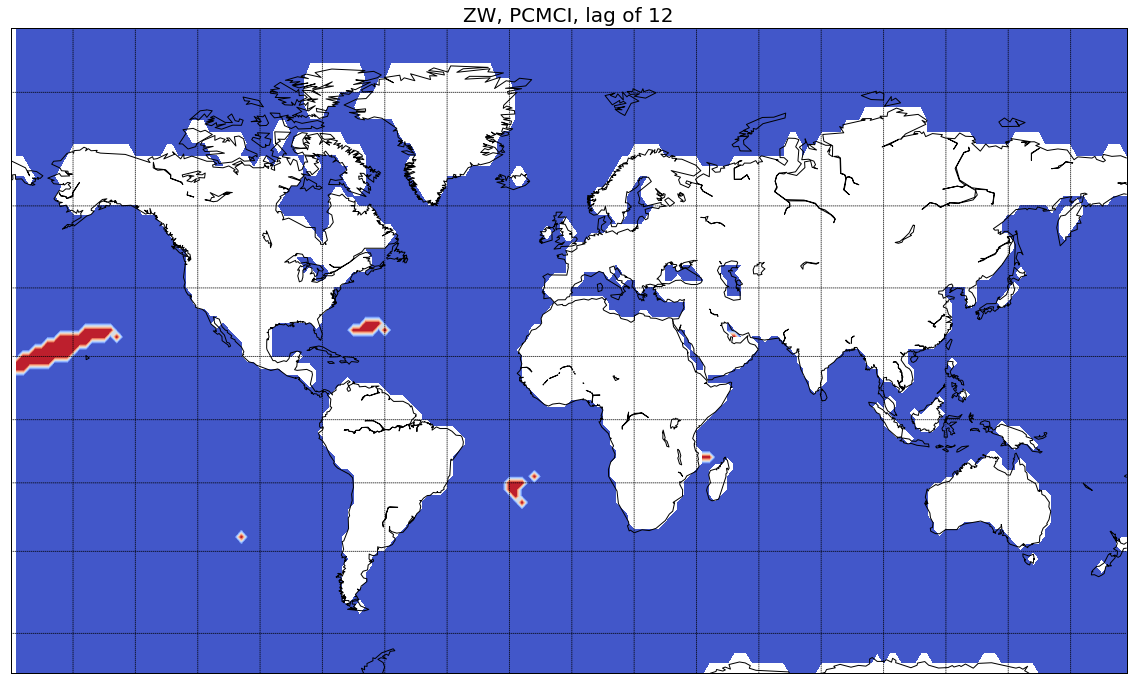

In [106]:
    #deg_result[deg_result > 0] = 1

    lon  = lon1_sst
    lat = lat_sst
    m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1_sst.min(), \
      urcrnrlon=lon1_sst.max(),llcrnrlat=lat_sst.min()+20,urcrnrlat=lat_sst.max(), \
      resolution='c')
    
    #m = Basemap(projection='robin',lon_0=0,resolution='c')

    lon2, lat2 = np.meshgrid(lon,lat)
    x, y = m(lon2, lat2)
    x, y = m(lon2, lat2)
    fig = plt.figure(figsize=(20,15))
    #m.fillcontinents(color='gray',lake_color='gray')
    m.drawcoastlines()
    m.drawparallels(np.arange(-80.,81.,20.))
    m.drawmeridians(np.arange(-180.,181.,20.))
    m.drawmapboundary(fill_color='white')
    cs = m.contourf(x,y,deg_result,20,cmap=plt.cm.get_cmap('coolwarm'))
    plt.title('ZW, PCMCI, lag of {}'.format(tau),fontsize=20)
    #cbar.ax.tick_params(labelsize=25)
    #plt.colorbar();
    #plt.savefig("EOF{}.png".format(pc))
    #plt.savefig("./areas/{}_PCMCI_{}.png".format(cc,tau))

In [124]:
step = 1
train_start = np.arange(1948,1977,step)
validation_end = np.arange(1982,2011,step)
test_start = np.arange(1983,2012,step)
test_end = np.arange(1987,2016,step)

n_components_sst = np.load("sst_number.npy")

In [129]:
ijz = 0

In [72]:
n_components_sst[ijz]

55

In [73]:
corr_h = np.load("../../whole_data_results/ET_orac/best_link_hybrid_2/corr_{}_{}_{}_{}_{}.npy".format(f,train_start[ijz],validation_end[ijz],tau,n_components_sst[ijz]))

In [125]:
tau = 12
result = []

for ijz in range(len(validation_end)):
    pcmci_h = np.load("../../whole_data_results/ET_orac/link_hybrid_1/pcmci_{}_{}_{}_{}_{}.npy".format(f,train_start[ijz],validation_end[ijz],tau,n_components_sst[ijz]))
    result.append(np.count_nonzero(corr_h[:,0] > n_components_sst[ijz]))

FileNotFoundError: [Errno 2] No such file or directory: '../../whole_data_results/ET_orac/link_hybrid_1/pcmci_12_1975_2009_12_57.npy'

In [130]:
np.load("../../whole_data_results/ET_orac/link_hybrid_1/pcmci_{}_{}_{}_{}_{}.npy".format(f,train_start[ijz],validation_end[ijz],tau,n_components_sst[ijz]))

array([[ 95, -12],
       [ 95, -13],
       [ 29, -14],
       [ 83, -12],
       [ 68, -18],
       [ 95, -21],
       [ 62, -23],
       [ 67, -13],
       [ 73, -23],
       [ 87, -20],
       [ 62, -22],
       [ 95, -20],
       [ 11, -16],
       [ 23, -12],
       [ 31, -17],
       [ 96, -14],
       [ 64, -15],
       [ 62, -17],
       [ 67, -14],
       [ 41, -22],
       [ 17, -12],
       [ 68, -17],
       [ 65, -17],
       [ 75, -23],
       [ 97, -16],
       [ 67, -12],
       [ 85, -20],
       [ 78, -20],
       [ 78, -21],
       [ 60, -18],
       [ 41, -23],
       [ 55, -20],
       [ 71, -16],
       [ 22, -16],
       [ 57, -13],
       [ 36, -22],
       [ 35, -15],
       [ 85, -17],
       [  3, -19],
       [ 44, -12],
       [ 25, -13],
       [ 36, -18],
       [ 87, -18],
       [ 95, -22],
       [ 69, -14],
       [ 85, -18],
       [ 85, -23],
       [ 53, -13],
       [ 97, -15],
       [ 95, -14],
       [ 57, -12],
       [ 85, -16],
       [ 66,

In [121]:
np.load("../../whole_data_results/ET_orac/best_link_hybrid_2/corr_{}_{}_{}_{}_{}.npy".format(f,train_start[ijz],validation_end[ijz],tau,n_components_sst[ijz]))

array([[ 10, -13],
       [  3, -23],
       [  9, -16],
       [  2, -23],
       [ 38, -21],
       [  7, -23],
       [ 52, -12],
       [ 15, -15],
       [ 28, -18],
       [ 38, -19]])

In [32]:
lon_sst

array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,
        22.,  24.,  26.,  28.,  30.,  32.,  34.,  36.,  38.,  40.,  42.,
        44.,  46.,  48.,  50.,  52.,  54.,  56.,  58.,  60.,  62.,  64.,
        66.,  68.,  70.,  72.,  74.,  76.,  78.,  80.,  82.,  84.,  86.,
        88.,  90.,  92.,  94.,  96.,  98., 100., 102., 104., 106., 108.,
       110., 112., 114., 116., 118., 120., 122., 124., 126., 128., 130.,
       132., 134., 136., 138., 140., 142., 144., 146., 148., 150., 152.,
       154., 156., 158., 160., 162., 164., 166., 168., 170., 172., 174.,
       176., 178., 180., 182., 184., 186., 188., 190., 192., 194., 196.,
       198., 200., 202., 204., 206., 208., 210., 212., 214., 216., 218.,
       220., 222., 224., 226., 228., 230., 232., 234., 236., 238., 240.,
       242., 244., 246., 248., 250., 252., 254., 256., 258., 260., 262.,
       264., 266., 268., 270., 272., 274., 276., 278., 280., 282., 284.,
       286., 288., 290., 292., 294., 296., 298., 30

In [35]:
set(df_sst['lons'].values)

{-178.0,
 -176.0,
 -174.0,
 -172.0,
 -170.0,
 -168.0,
 -166.0,
 -164.0,
 -162.0,
 -160.0,
 -158.0,
 -156.0,
 -154.0,
 -152.0,
 -150.0,
 -148.0,
 -146.0,
 -144.0,
 -142.0,
 -140.0,
 -138.0,
 -136.0,
 -134.0,
 -132.0,
 -130.0,
 -128.0,
 -126.0,
 -124.0,
 -122.0,
 -120.0,
 -118.0,
 -116.0,
 -114.0,
 -112.0,
 -110.0,
 -108.0,
 -106.0,
 -104.0,
 -102.0,
 -100.0,
 -98.0,
 -96.0,
 -94.0,
 -92.0,
 -90.0,
 -88.0,
 -86.0,
 -84.0,
 -82.0,
 -80.0,
 -78.0,
 -76.0,
 -74.0,
 -72.0,
 -70.0,
 -68.0,
 -66.0,
 -64.0,
 -62.0,
 -60.0,
 -58.0,
 -56.0,
 -54.0,
 -52.0,
 -50.0,
 -48.0,
 -46.0,
 -44.0,
 -42.0,
 -40.0,
 -38.0,
 -36.0,
 -34.0,
 -32.0,
 -30.0,
 -28.0,
 -26.0,
 -24.0,
 -22.0,
 -20.0,
 -18.0,
 -16.0,
 -14.0,
 -12.0,
 -10.0,
 -8.0,
 -6.0,
 -4.0,
 -2.0,
 0.0,
 2.0,
 4.0,
 6.0,
 8.0,
 10.0,
 12.0,
 14.0,
 16.0,
 18.0,
 20.0,
 22.0,
 24.0,
 26.0,
 28.0,
 30.0,
 32.0,
 34.0,
 36.0,
 38.0,
 40.0,
 42.0,
 44.0,
 46.0,
 48.0,
 50.0,
 52.0,
 54.0,
 56.0,
 58.0,
 60.0,
 62.0,
 64.0,
 66.0,
 68.0,
 70.0,
 72.0

In [39]:
lon1_sst = np.arange(-178,182,2)

In [15]:
index = deg_result > 0

In [16]:
index_result = np.zeros(10988, dtype=bool)

In [40]:
for i in range(data_sst.shape[1]):
    if not len(np.where(lon1_sst == df_sst.iloc[i,0])[0])==0:
        lon_index = np.where(lon1_sst == df_sst.iloc[i,0])[0][0]
    else:
        continue
    
    if not len(np.where(lat_sst == df_sst.iloc[i,1])[0])==0:
        lat_index = np.where(lat_sst == df_sst.iloc[i,1])[0][0]
    else:
        continue
           
    if index[lat_index,lon_index] == True:
        index_result[i] = True

In [41]:
np.count_nonzero(index)

80

In [42]:
file_name = '../../../nc/sst.mnmean.nc'
code = "sst"
temporal_limits 
missing_value  = -9.96921e+36
temporal_limits = {"time_min":datetime(1930, 1, 1, 0, 0),"time_max":datetime(2015, 12, 1, 0, 0)}

In [43]:
sst = Data(file_name,code,temporal_limits, missing_value= missing_value)
result = sst.get_data()

In [153]:
count, _ = ff.drought_timeseries("ET_gamma_18912015_12.npy",1976,2010, extremes_treshold = -1)
count = np.array(count)/371

In [44]:
result.shape

(1032, 10988)

In [45]:
d = result[:,index_result].mean(1)

In [55]:
d = data_sst[:,index_result].mean(1)

In [47]:
d_norm = (d-d.min())/(d.max() - d.min())

In [53]:
x = np.arange('1970-01', '2016-01', dtype='datetime64[M]')

In [ ]:
    for i in range(len(range_min)):
        plt.axvspan(range_min[i], range_max[i], facecolor='grey', alpha=0.5)

In [58]:
len(x)

552

In [89]:
x = np.arange(552)

In [79]:
(2008 - 1969)*12

468

In [83]:
(468 + 1969*12)/12

2008.0

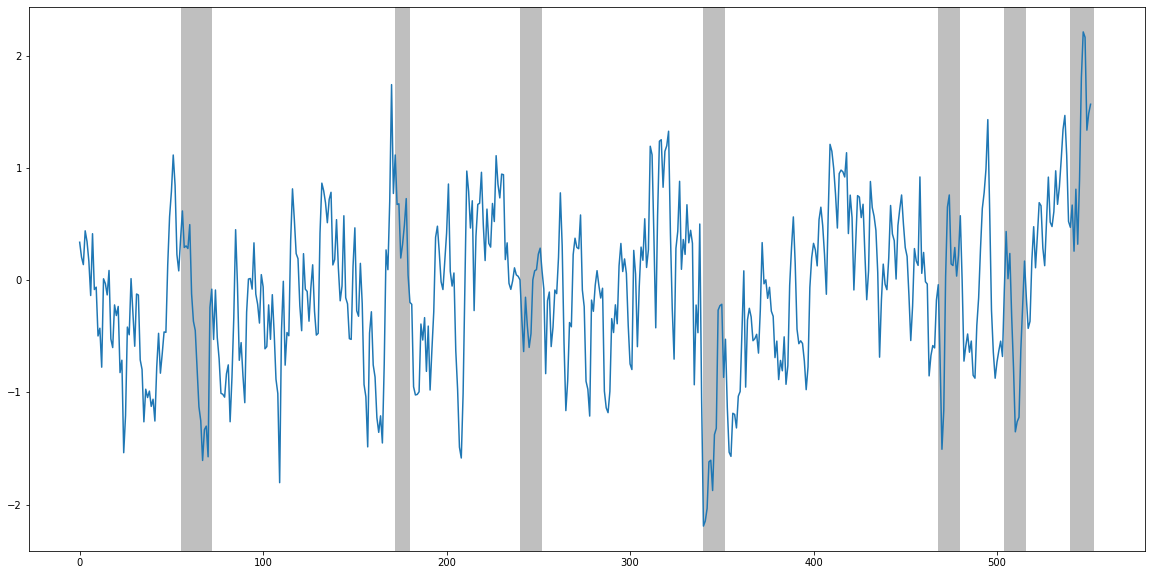

In [90]:
#x = np.arange('1930-01', '2016-01', dtype='datetime64[M]')
plt.plot(x, d[-552:])
plt.axvspan(55, 72, facecolor='grey', alpha=0.5)
plt.axvspan(172, 180, facecolor='grey', alpha=0.5)
plt.axvspan(240, 252, facecolor='grey', alpha=0.5)
plt.axvspan(340, 352, facecolor='grey', alpha=0.5)
plt.axvspan(468, 480, facecolor='grey', alpha=0.5)
plt.axvspan(504, 516, facecolor='grey', alpha=0.5)
plt.axvspan(540, 553, facecolor='grey', alpha=0.5)

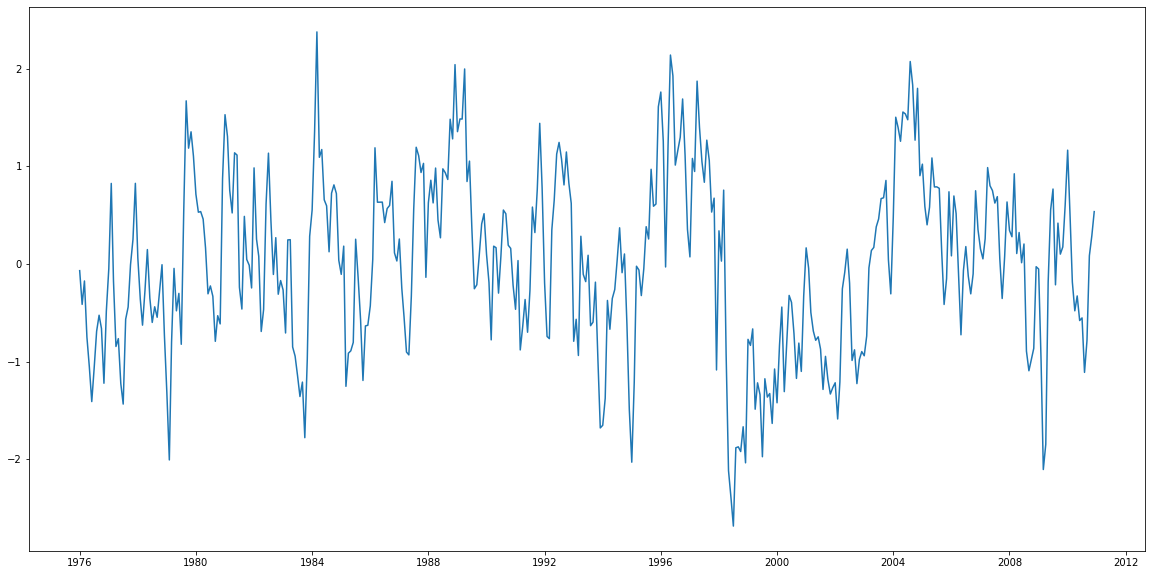

In [161]:
x = np.arange('1976-01', '2011-01', dtype='datetime64[M]')
plt.plot(x, d)

In [166]:
d_log = np.log(d)

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


In [168]:
d_log[np.isnan(d_log)]=0

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """


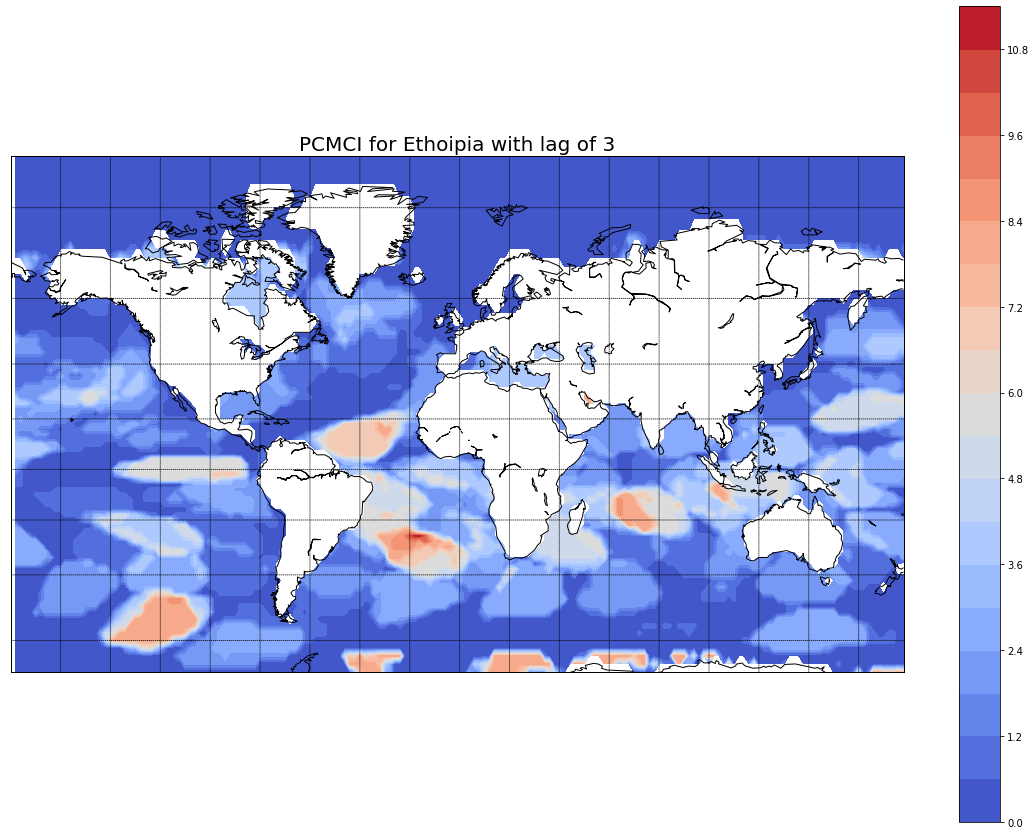

In [10]:
    #deg_result[deg_result > 0] = 1

    lon  = lon1_sst
    lat = lat_sst
    m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1_sst.min(), \
      urcrnrlon=lon1_sst.max(),llcrnrlat=lat_sst.min()+20,urcrnrlat=lat_sst.max(), \
      resolution='c')

    lon2, lat2 = np.meshgrid(lon,lat)
    x, y = m(lon2, lat2)
    x, y = m(lon2, lat2)
    fig = plt.figure(figsize=(20,15))
    #m.fillcontinents(color='gray',lake_color='gray')
    m.drawcoastlines()
    m.drawparallels(np.arange(-80.,81.,20.))
    m.drawmeridians(np.arange(-180.,181.,20.))
    m.drawmapboundary(fill_color='white')
    cs = m.contourf(x,y,deg_result,20,cmap=plt.cm.get_cmap('coolwarm'))
    plt.title('PCMCI for Ethoipia with lag of {}'.format(tau),fontsize=20)
    #cbar.ax.tick_params(labelsize=25)
    plt.colorbar();
    #plt.savefig("EOF{}.png".format(pc))
    plt.savefig("./areas/{}_PCMCI_{}.png".format(cc,tau))

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """


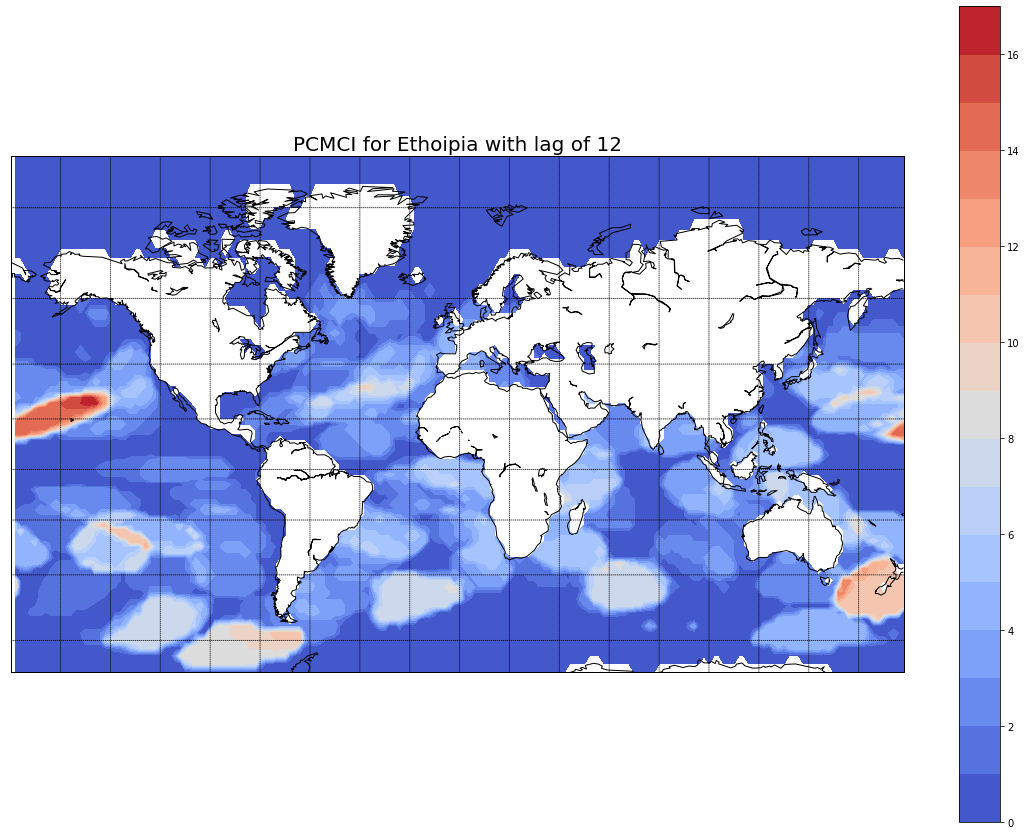

In [17]:
    #deg_result[deg_result > 0] = 1

    lon  = lon1_sst
    lat = lat_sst
    m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1_sst.min(), \
      urcrnrlon=lon1_sst.max(),llcrnrlat=lat_sst.min()+20,urcrnrlat=lat_sst.max(), \
      resolution='c')

    lon2, lat2 = np.meshgrid(lon,lat)
    x, y = m(lon2, lat2)
    x, y = m(lon2, lat2)
    fig = plt.figure(figsize=(20,15))
    #m.fillcontinents(color='gray',lake_color='gray')
    m.drawcoastlines()
    m.drawparallels(np.arange(-80.,81.,20.))
    m.drawmeridians(np.arange(-180.,181.,20.))
    m.drawmapboundary(fill_color='white')
    cs = m.contourf(x,y,deg_result,20,cmap=plt.cm.get_cmap('coolwarm'))
    plt.title('PCMCI for Ethoipia with lag of {}'.format(tau),fontsize=20)
    #cbar.ax.tick_params(labelsize=25)
    plt.colorbar();
    #plt.savefig("EOF{}.png".format(pc))
    #plt.savefig("./areas/{}_PCMCI_{}.png".format(cc,tau))